In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import itertools

import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
results = pd.read_csv("metrics.csv")

dataf = results[results["algo"] == "datafly"]
mondr = results[results["algo"] == "mondrian"]
dataf_shuff = results[results["algo"] == "datafly_shuffled"]

In [29]:
mond_accs = dataf["acc"].value_counts()
mond_accs

0.505405    165
0.607432      2
0.616892      2
0.678378      1
0.641216      1
0.502027      1
0.579730      1
0.501351      1
0.564189      1
0.546622      1
0.551351      1
0.573649      1
0.593243      1
0.655405      1
0.633108      1
0.525676      1
0.531757      1
0.590541      1
0.631081      1
0.508784      1
0.625676      1
0.561486      1
0.587162      1
0.548649      1
0.507432      1
0.558108      1
0.666216      1
0.529054      1
0.588514      1
0.613514      1
0.518243      1
0.606757      1
0.500000      1
Name: acc, dtype: int64

In [4]:
results

,algo,no,precision,dm,cm,entropy,discern,ilm,acc
0,datafly,2,0.033311,0.0800,0.397432,0.976796,0.540324,0.046488,0.505405
1,datafly_shuffled,2,0.025027,0.0325,0.433784,0.972464,0.336206,0.049454,0.545270
2,mondrian,2,0.410685,0.5875,0.235405,0.819110,0.000530,0.045995,0.494595
3,datafly,3,0.016667,0.0300,0.425811,0.992277,0.865115,0.048374,0.505405
4,datafly_shuffled,3,0.033333,0.0500,0.389730,0.940804,0.096205,0.048419,0.537838
...,...,...,...,...,...,...,...,...,...
592,datafly_shuffled,199,0.033333,0.0500,0.396216,0.946311,0.137907,0.048051,0.497973
593,mondrian,199,0.418665,0.6075,0.262568,0.819337,0.000522,0.047188,0.494595
594,datafly,200,0.025017,0.0325,0.382838,0.988104,0.755179,0.048139,0.505405
595,datafly_shuffled,200,0.033324,0.0825,0.365135,0.949093,0.159284,0.047892,0.505405


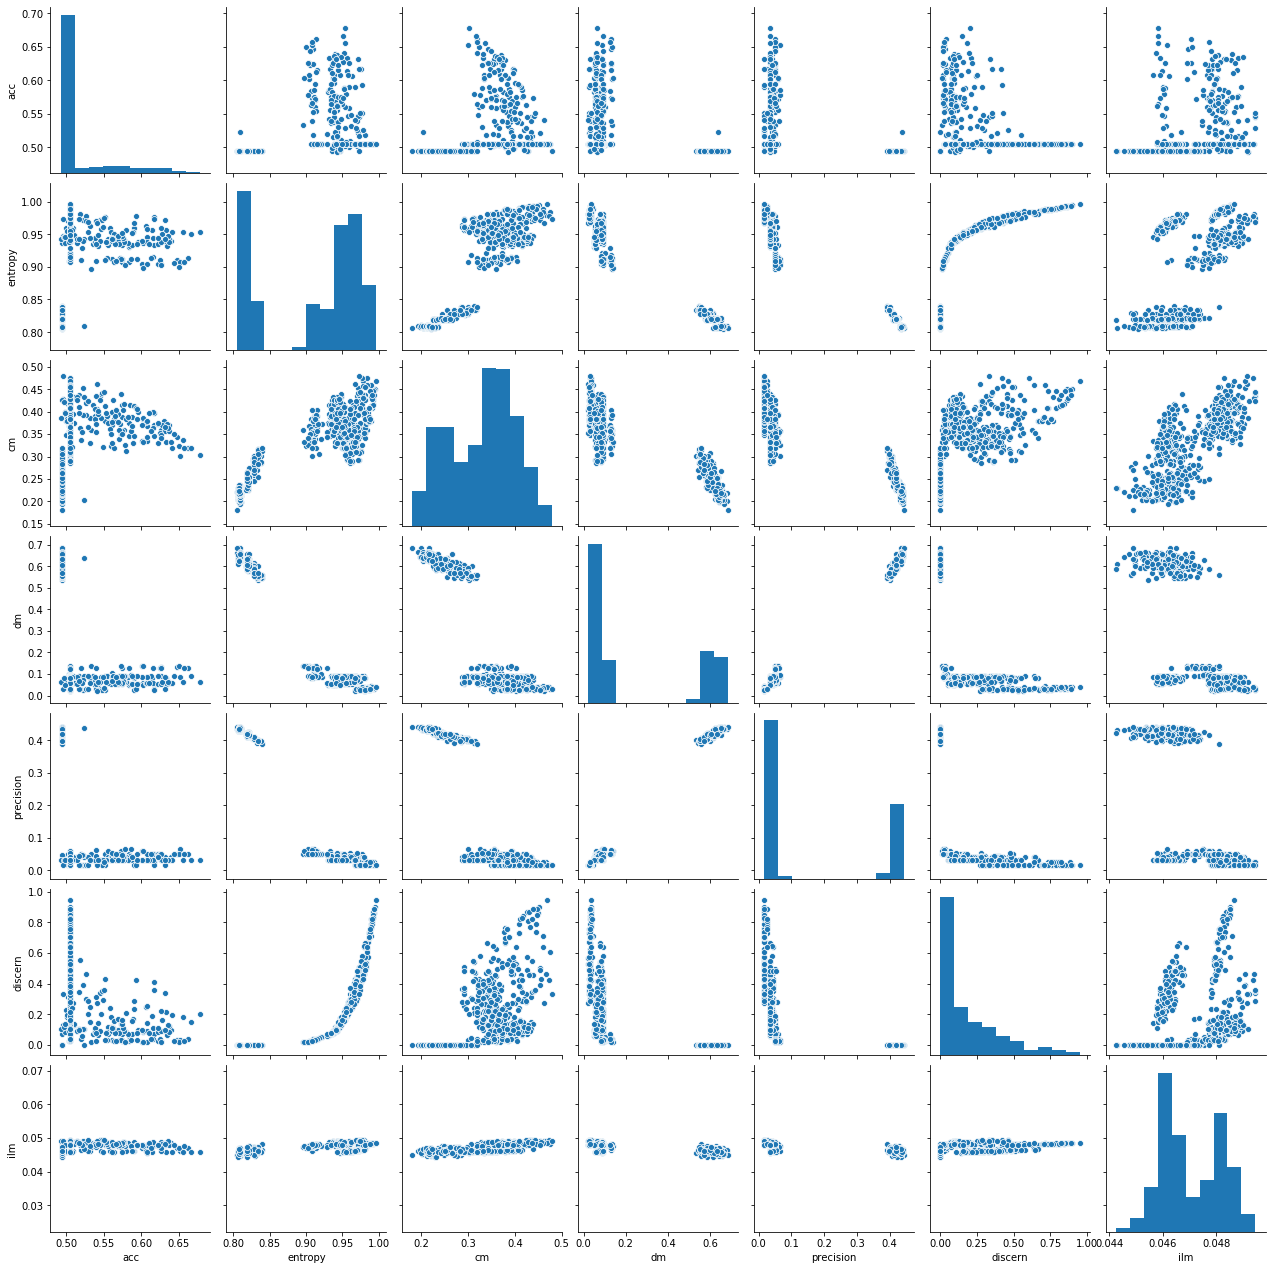

In [5]:
sb.pairplot(results[["acc", "entropy", "cm", "dm", "precision", "discern", "ilm"]])

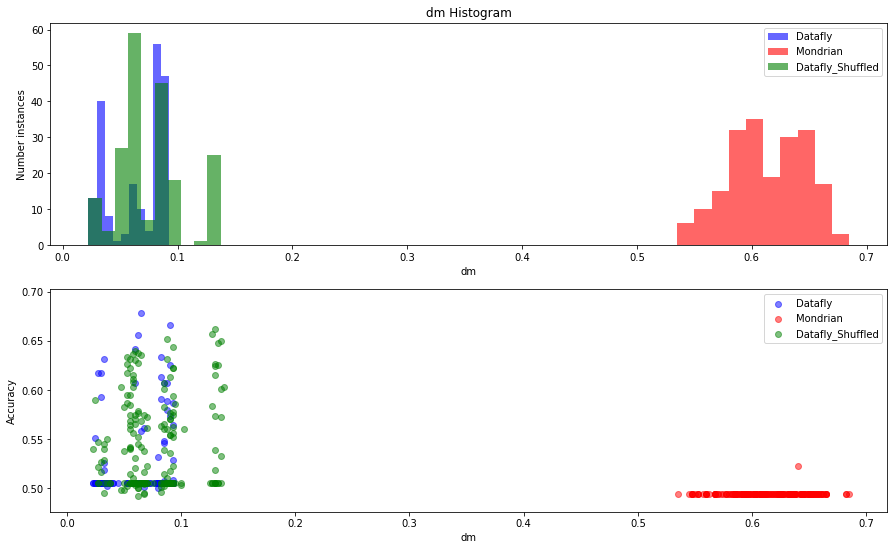

In [6]:
def plot_metric(metric):    
    fig, (ax1, ax2)= plt.subplots(2,1, figsize=(15,9))
    dataflys = results[results["algo"] == "datafly"]
    dataflys_shuff = results[results["algo"] == "datafly_shuffled"]
    mondrians = results[results["algo"] == "mondrian"]
    
    ax1.hist(dataflys[metric], label="Datafly", color="b", alpha=.6)
    ax1.hist(mondrians[metric], label="Mondrian", color="r", alpha=.6)
    ax1.hist(dataflys_shuff[metric], label="Datafly_Shuffled", color="g", alpha=.6)
    ax1.set_xlabel(metric)
    ax1.set_ylabel("Number instances")
    ax1.legend()
    ax1.set_title(f"{metric} Histogram")
    
    ax2.scatter(dataflys[metric], dataflys["acc"], c="b", alpha=0.5, label="Datafly")
    ax2.scatter(mondrians[metric], mondrians["acc"], c="r", alpha=0.5, label="Mondrian")
    ax2.scatter(dataflys_shuff[metric], dataflys_shuff["acc"], c="g", alpha=0.5, label="Datafly_Shuffled")
    ax2.set_xlabel(metric)
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    
plot_metric("dm")

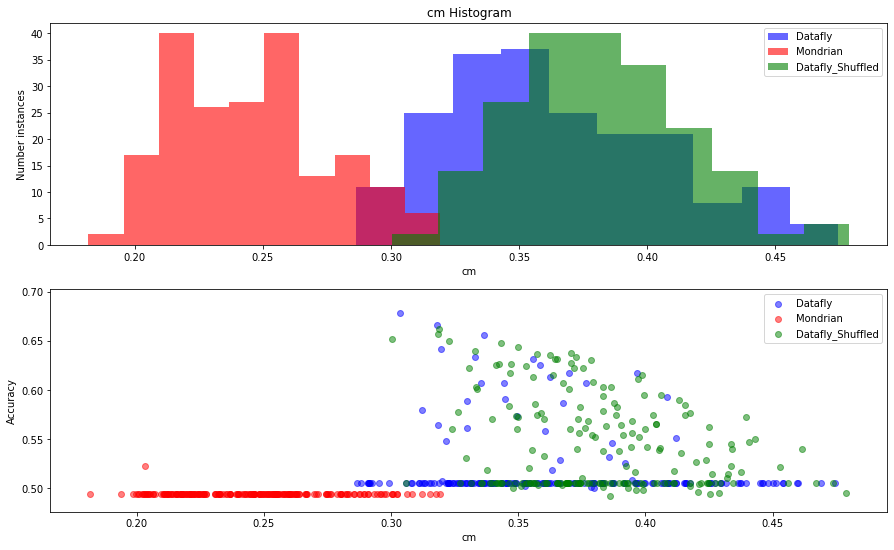

In [7]:
plot_metric("cm")

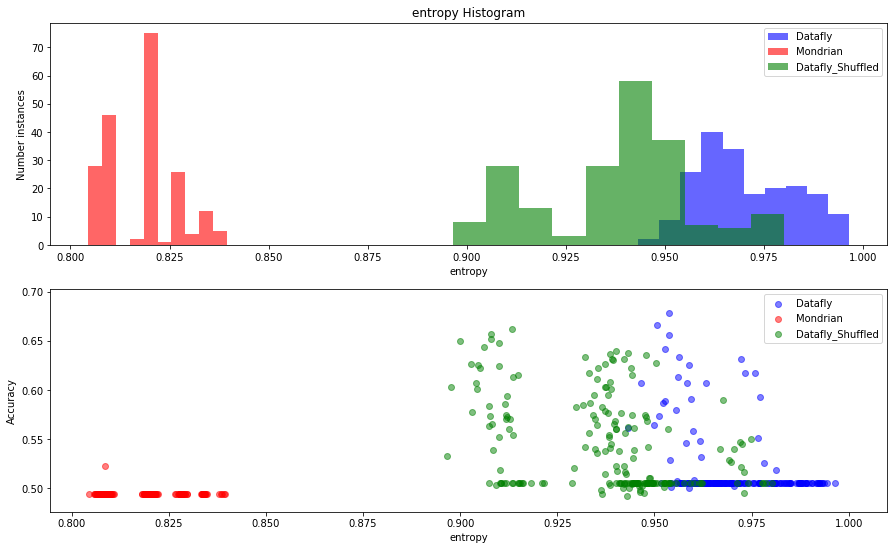

In [8]:
plot_metric("entropy")

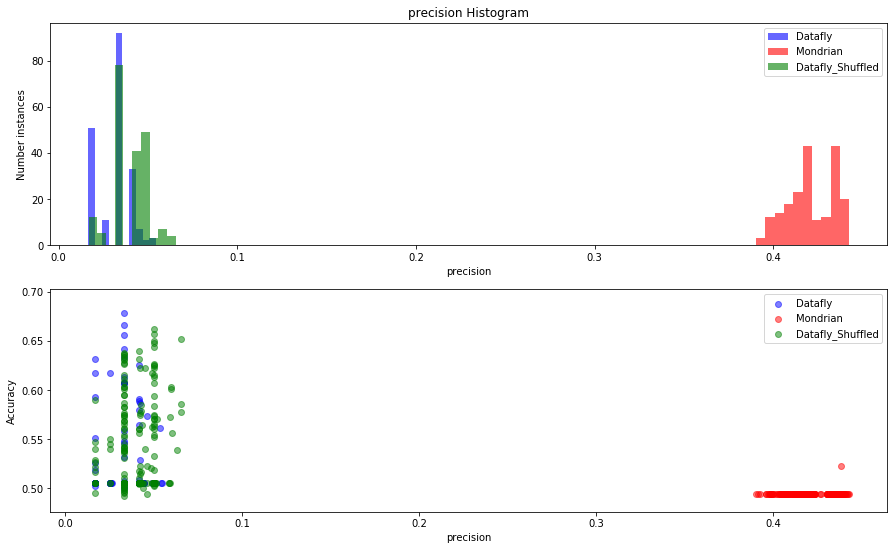

In [9]:
plot_metric("precision")

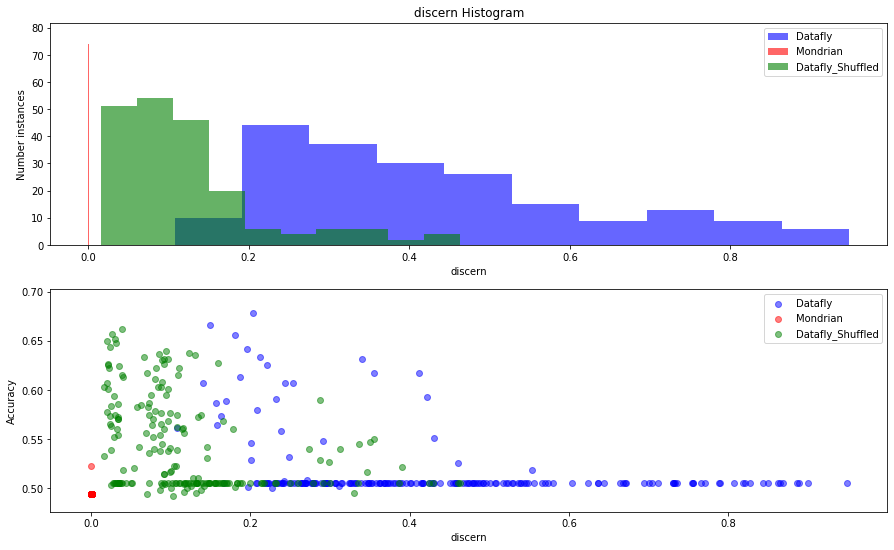

In [10]:
plot_metric("discern")

In [30]:
mondr["discern"].value_counts()

0.000335    5
0.000335    5
0.000334    4
0.000334    3
0.000333    3
           ..
0.000714    1
0.000721    1
0.000528    1
0.000521    1
0.000910    1
Name: discern, Length: 152, dtype: int64

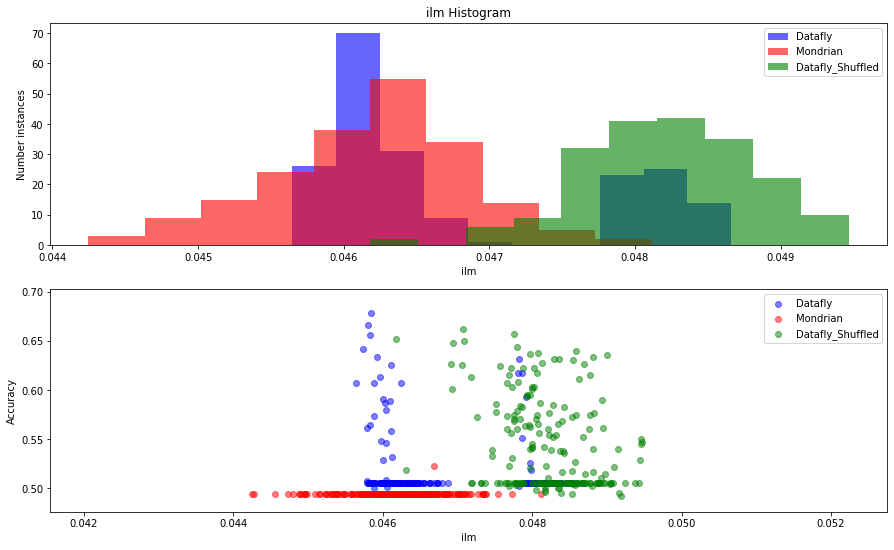

In [12]:
plot_metric("ilm")

# Predicting Power

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def regress(regressor, algo_data):

    X = algo_data[regressor]
    y = algo_data["acc"]

    reg = LinearRegression()
    reg.fit(X, y)

    score = reg.score(X,y)
    return reg, score

def mse(reg, attributes):
    attrs = np.array(results[attributes])
    attrs = attrs.reshape(-1,1) if len(attrs) == 1 else attrs
    y_pred = reg.predict(attrs)
    y_true = results["acc"]
    mse = mean_squared_error(y_true, y_pred)
    return mse

mses = []

In [14]:
def fit_and_graph(regressor, algo_data):
    print(f"Regression on {algo_data['algo'].iloc[0]}")
    reg, score = regress([regressor], algo_data)
    coeff = reg.coef_
    intercept = reg.intercept_
    
    err = mse(reg, [regressor])
    print(f"p-value: {scipy.stats.pearsonr(algo_data[regressor],algo_data['acc'])[1]}")
    print(f"R2 Score: {score}")
    print(f"MSE: {err}")
    print(f"Coeffs: {coeff}")
    print(f"Intercept: {intercept}")
    
    x = np.linspace(0,1,100)
    l = coeff*x + intercept
    
    algo_data.plot.scatter(regressor, "acc", figsize=(15,6), grid=True, 
                           title=f"Linear regression of the {regressor}({algo_data['algo'].iloc[0]})")
            
    plt.plot(x,l)
    


### Entropy

Regression on datafly
p-value: 3.98233860534281e-07
R2 Score: 0.12260621348249578
MSE: 0.01142833116736767
Coeffs: [-1.01061084]
Intercept: 1.4985564494404708

Regression on mondrian
p-value: 0.26411148668439044
R2 Score: 0.006326322848841492
MSE: 0.0021955275140844092
Coeffs: [-0.01792492]
Intercept: 0.5094012469779248

Regression on datafly_shuffled
p-value: 1.0469037097638822e-08
R2 Score: 0.15352210131871324
MSE: 0.009933703926711814
Coeffs: [-0.96132824]
Intercept: 1.4451511240739232


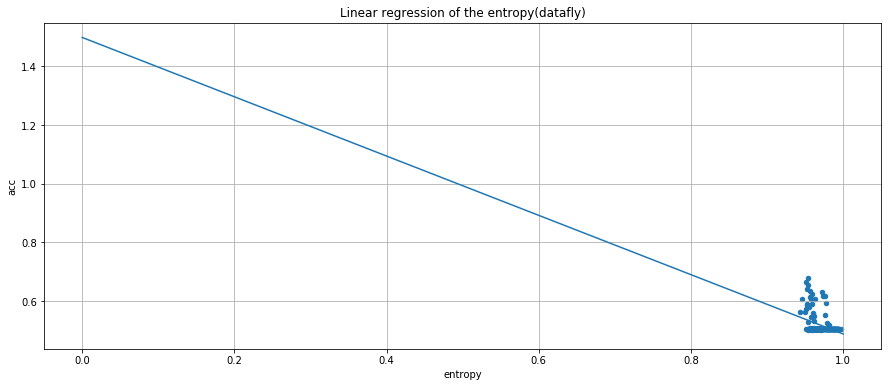

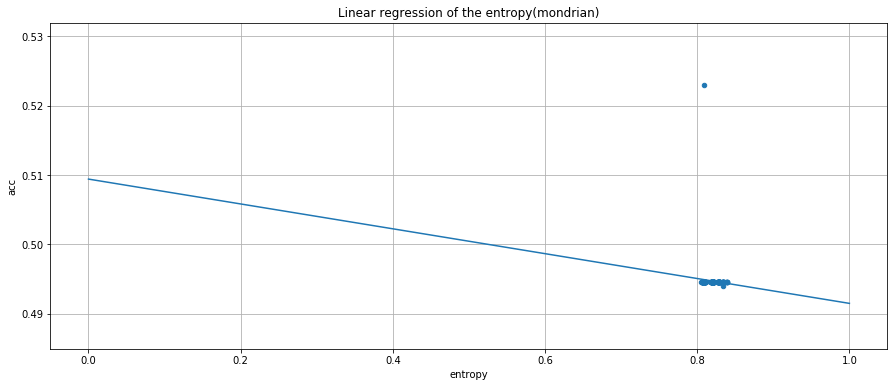

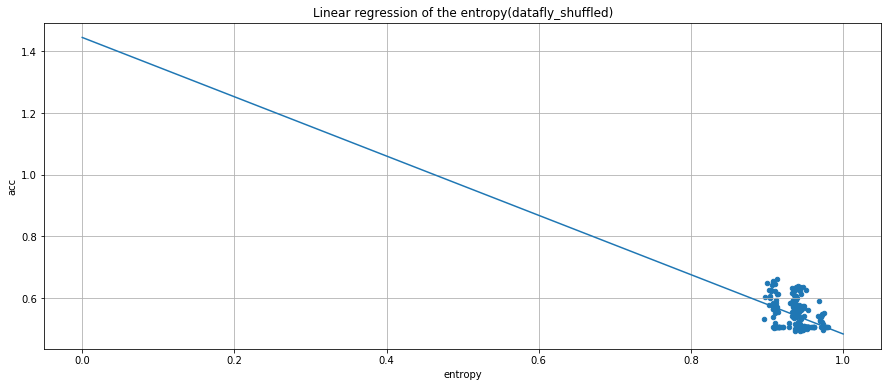

In [15]:
fit_and_graph("entropy", dataf)
print()
fit_and_graph("entropy", mondr)
print()
fit_and_graph("entropy", dataf_shuff)

### Classification Metric

Regression on datafly
p-value: 0.05254539855220677
R2 Score: 0.018944418251119144
MSE: 0.001772383959012078
Coeffs: [-0.11048879]
Intercept: 0.558101093128642

Regression on mondrian
p-value: 0.14325852022764712
R2 Score: 0.010844546994586368
MSE: 0.0021266722599124293
Coeffs: [-0.0070011]
Intercept: 0.496454042196796

Regression on datafly_shuffled
p-value: 5.1934894430594545e-05
R2 Score: 0.07995932154897012
MSE: 0.004939537864141862
Coeffs: [-0.39144579]
Intercept: 0.6926348832736182


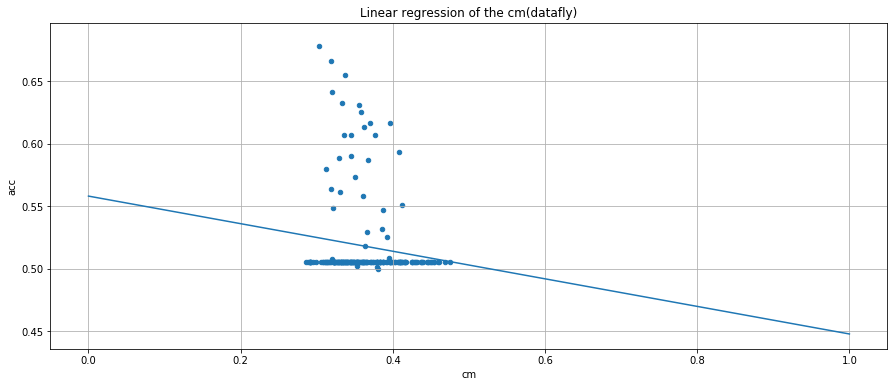

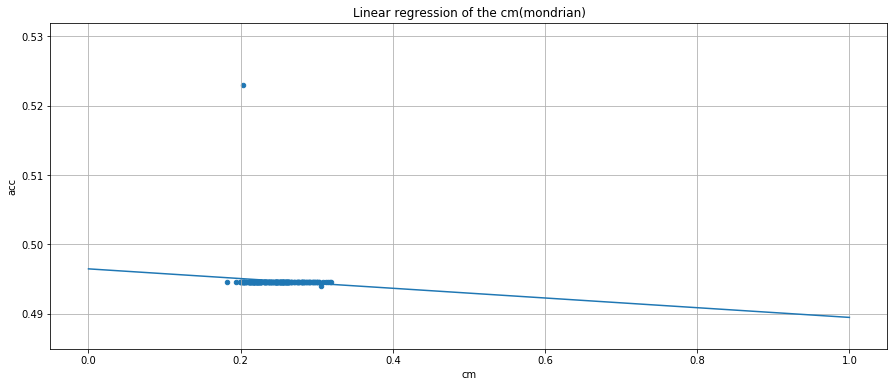

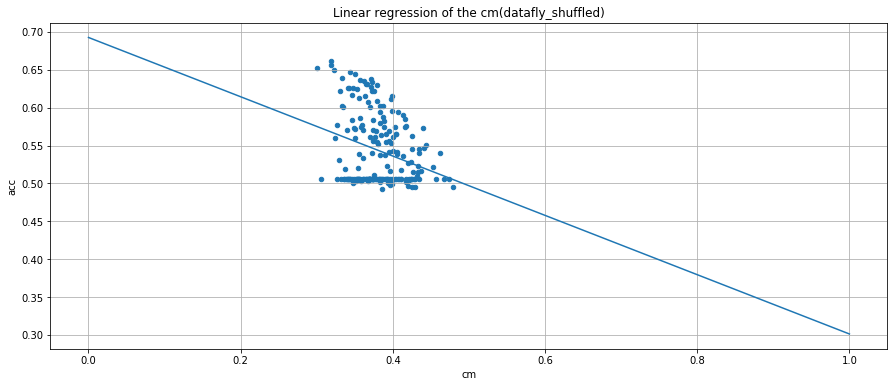

In [16]:
fit_and_graph("cm", dataf)
print()
fit_and_graph("cm", mondr)
print()
fit_and_graph("cm", dataf_shuff)

### DM

Regression on datafly
p-value: 0.46002070476193174
R2 Score: 0.002773968322043574
MSE: 0.0026727614234943113
Coeffs: [0.07425378]
Intercept: 0.5130425116424077

Regression on mondrian
p-value: 0.3871428905172219
R2 Score: 0.003798841968924882
MSE: 0.0021871165943861148
Coeffs: [0.00383104]
Intercept: 0.49238372949487796

Regression on datafly_shuffled
p-value: 0.05204212055694723
R2 Score: 0.019024774841086
MSE: 0.011310702967805873
Coeffs: [0.23188507]
Intercept: 0.5257773906895191


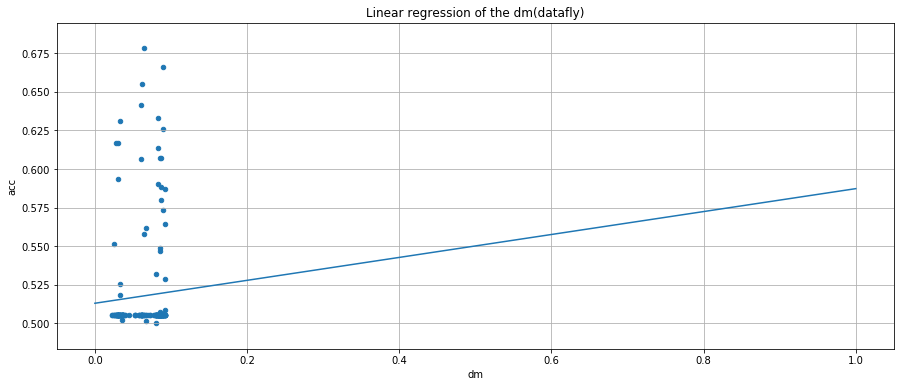

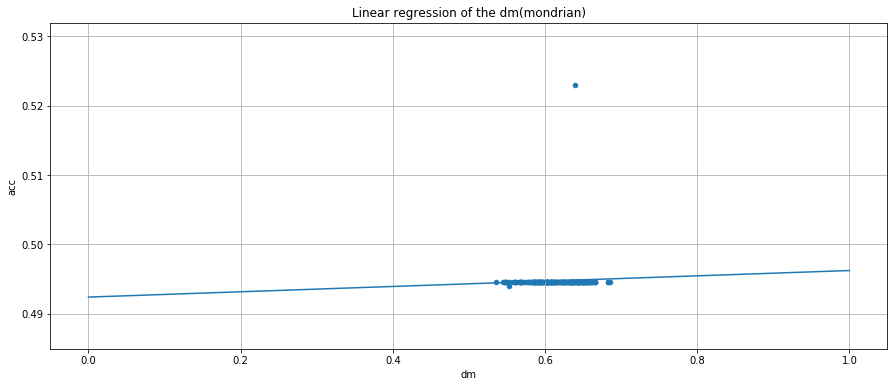

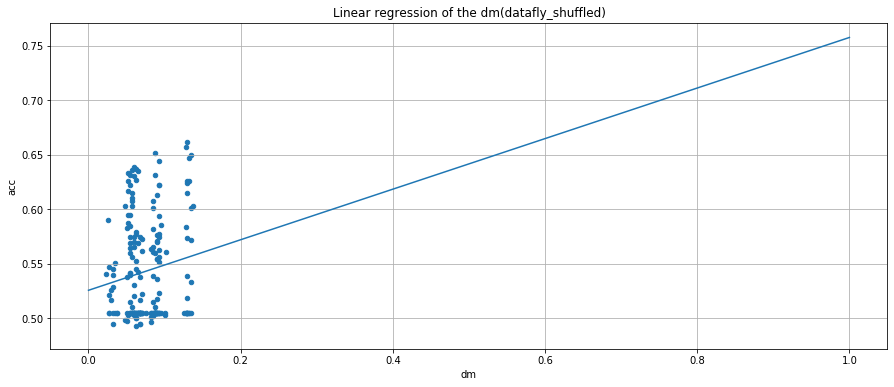

In [17]:
fit_and_graph("dm", dataf)
print()
fit_and_graph("dm", mondr)
print()
fit_and_graph("dm", dataf_shuff)

### Precision


Regression on datafly
p-value: 0.30325148999473106
R2 Score: 0.005379049223073973
MSE: 0.006430725257174063
Coeffs: [0.25916402]
Intercept: 0.5098735172285169

Regression on mondrian
p-value: 0.18245605277697405
R2 Score: 0.009004988055666518
MSE: 0.0023738091611614823
Coeffs: [0.01458115]
Intercept: 0.48859546858142705

Regression on datafly_shuffled
p-value: 0.01362340006142448
R2 Score: 0.03049848231623853
MSE: 0.04123801526891321
Coeffs: [0.78094495]
Intercept: 0.5123345517318073


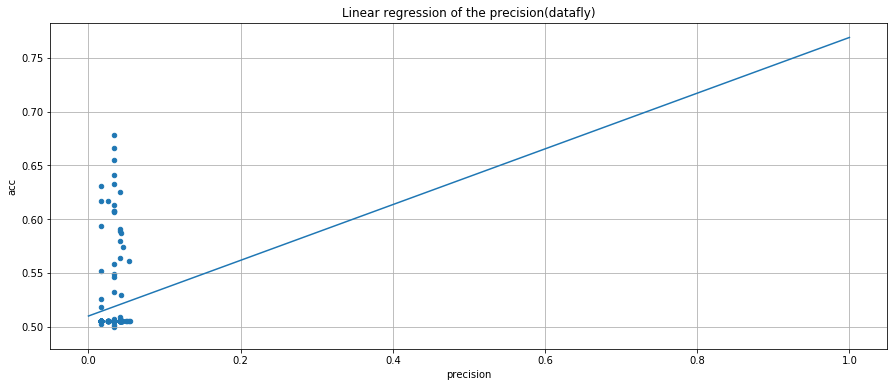

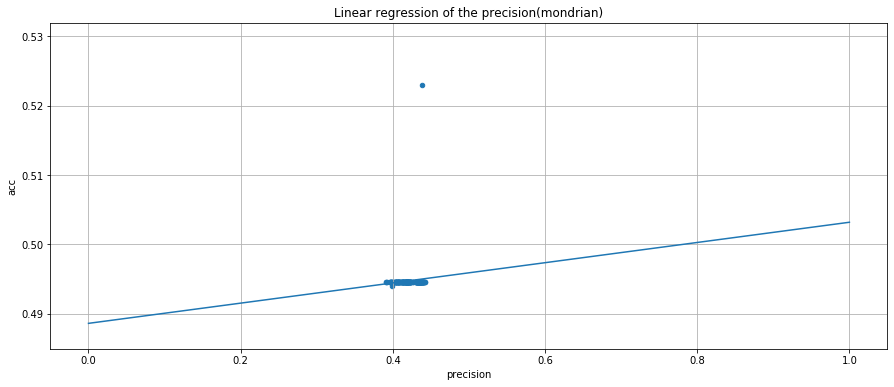

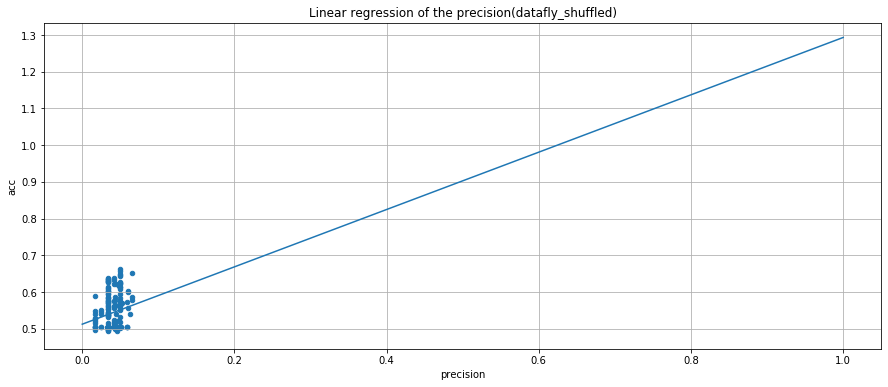

In [18]:
fit_and_graph("precision", dataf)
print()
fit_and_graph("precision", mondr)
print()
fit_and_graph("precision", dataf_shuff)


### Discernability

Regression on datafly
p-value: 3.736656722790215e-07
R2 Score: 0.12315476905723166
MSE: 0.001839848896466989
Coeffs: [-0.06151702]
Intercept: 0.5440639644872778

Regression on mondrian
p-value: 0.30880569905594196
R2 Score: 0.005257238235836347
MSE: 0.05507116538607272
Coeffs: [-0.76237066]
Intercept: 0.495130944136107

Regression on datafly_shuffled
p-value: 1.3159922962608496e-07
R2 Score: 0.13210773993529568
MSE: 0.0031162065452543714
Coeffs: [-0.1815321]
Intercept: 0.5655439611228048


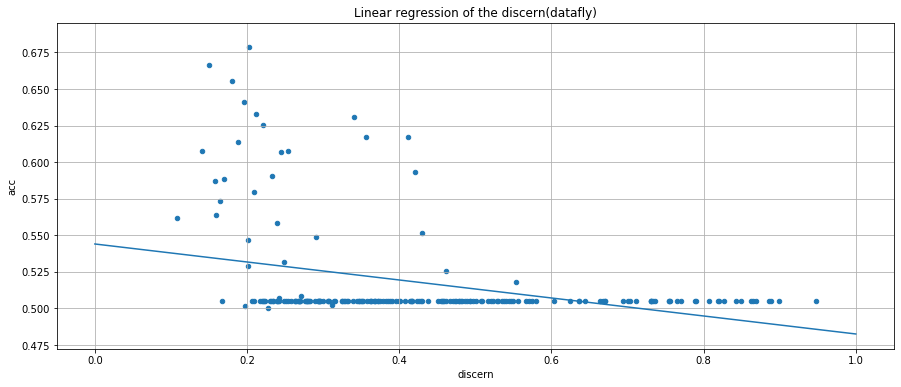

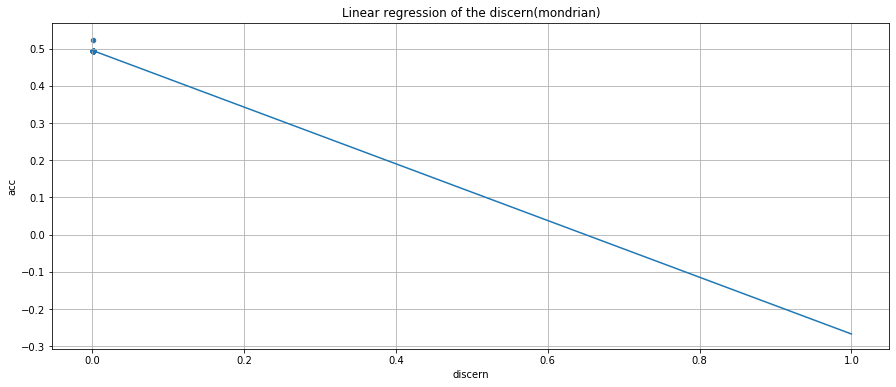

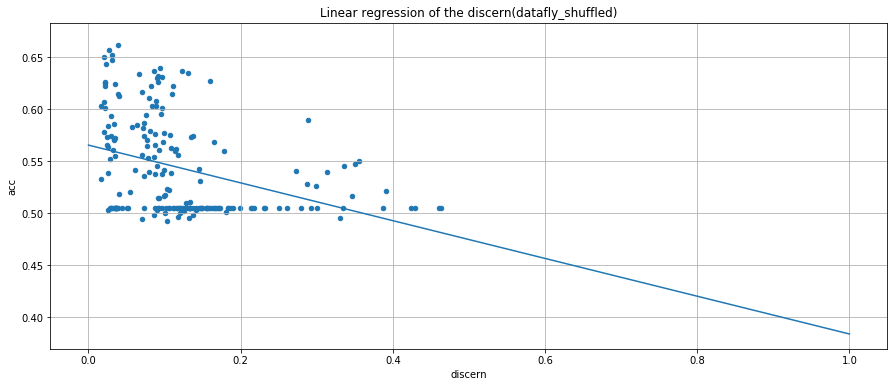

In [19]:
fit_and_graph("discern", dataf)
print()
fit_and_graph("discern", mondr)
print()
fit_and_graph("discern", dataf_shuff)

### Information Loss Metric

Regression on datafly
p-value: 0.014220166045483455
R2 Score: 0.03012493406485839
MSE: 0.0017131940509804737
Coeffs: [-6.1949732]
Intercept: 0.8077126228676025

Regression on mondrian
p-value: 0.45097783778983497
R2 Score: 0.0028873801179963854
MSE: 0.0020747839666776353
Coeffs: [0.1656209]
Intercept: 0.48708367185954415

Regression on datafly_shuffled
p-value: 2.1877638930201368e-06
R2 Score: 0.1078376457437129
MSE: 0.006089100834293073
Coeffs: [-26.44555744]
Intercept: 1.8186132379879725


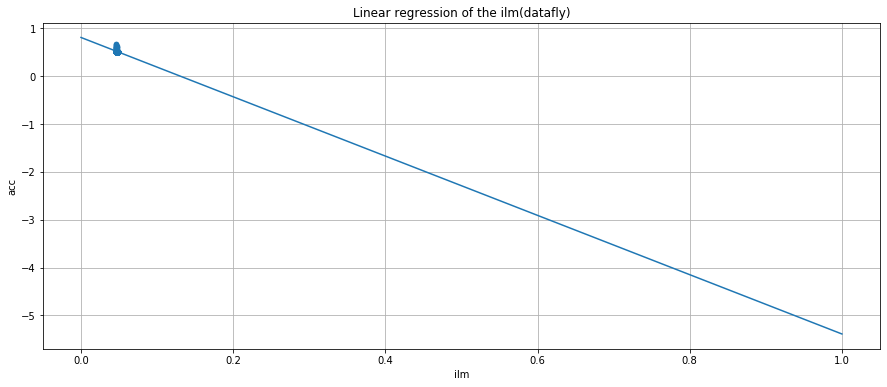

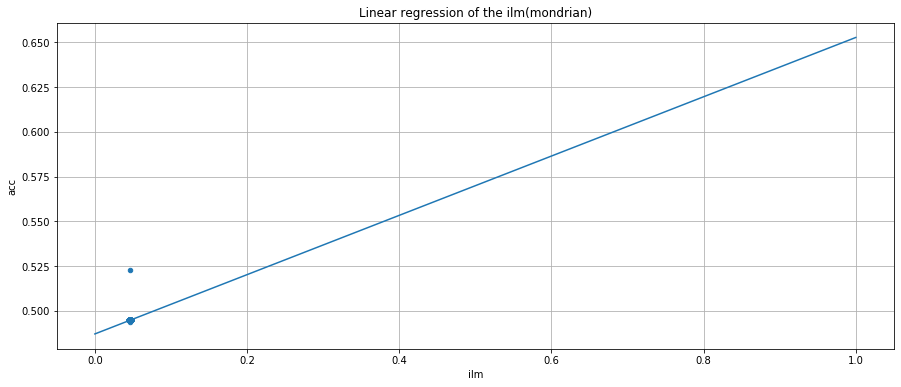

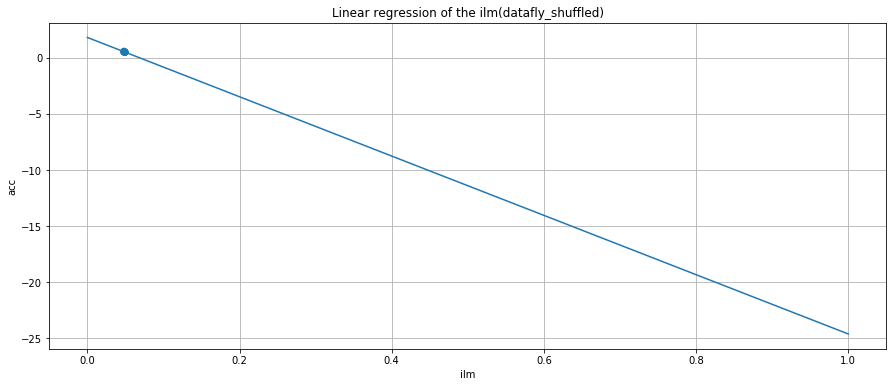

In [20]:
fit_and_graph("ilm", dataf)
print()
fit_and_graph("ilm", mondr)
print()
fit_and_graph("ilm", dataf_shuff)

### Multiple Metrics

In [21]:
metrics = ["entropy", "cm", "dm", "precision", "discern", "ilm"]

res = []
for i in range(1,6):
    
    for comb in itertools.combinations(metrics, i):
        
        ms = list(comb)
        for alg in [dataf, mondr, dataf_shuff]:
            name = alg["algo"].iloc[0] 
            reg, score = regress(ms, alg)
            err = mse(reg, ms)
            p_val = scipy.stats.pearsonr(alg[ms[0]], alg['acc'])[1] if i == 1 else None
            res.append((str(ms), name, p_val, score, err))

            
df = pd.DataFrame(res, columns=["metrics", "algo", "p_value", "R2_score", "MSE_error"])
df = df.set_index(["metrics", "algo"])
df.head(20)

p_value  R2_score  MSE_error
metrics           algo                                               
['entropy']       datafly           3.982339e-07  0.122606   0.011428
                  mondrian          2.641115e-01  0.006326   0.002196
                  datafly_shuffled  1.046904e-08  0.153522   0.009934
['cm']            datafly           5.254540e-02  0.018944   0.001772
                  mondrian          1.432585e-01  0.010845   0.002127
                  datafly_shuffled  5.193489e-05  0.079959   0.004940
['dm']            datafly           4.600207e-01  0.002774   0.002673
                  mondrian          3.871429e-01  0.003799   0.002187
                  datafly_shuffled  5.204212e-02  0.019025   0.011311
['precision']     datafly           3.032515e-01  0.005379   0.006431
                  mondrian          1.824561e-01  0.009005   0.002374
                  datafly_shuffled  1.362340e-02  0.030498   0.041238
['discern']       datafly           3.736657e-07  0.123155   0.001840
                  mondrian          3.088057e-01  0.005257   0.055071
                  datafly_shuffled  1.315992e-07  0.132108   0.003116
['ilm']           datafly           1.422017e-02  0.030125   0.001713
                  mondrian          4.509778e-01  0.002887   0.002075
                  datafly_shuffled  2.187764e-06  0.107838   0.006089
['entropy', 'cm'] datafly                    NaN  0.141589   0.016603
                  mondrian                   NaN  0.012420   0.002031